# Bank Marketing Classification

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [5]:
df = pd.read_csv('bank_marketing_data.csv')
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


# EDA

In [6]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


In [7]:
df.shape

(8238, 17)

The data consists of 17 columns and 8238 records.

In [8]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

There are 17 variables, where 'y' is the target variable. The other 16 independent variables include 'Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', and 'poutcome'.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8238 non-null   int64  
 1   age          8238 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8238 non-null   object 
 4   education    8238 non-null   object 
 5   default      8238 non-null   object 
 6   housing      8238 non-null   object 
 7   loan         8238 non-null   object 
 8   contact      8238 non-null   object 
 9   month        8238 non-null   object 
 10  day_of_week  8238 non-null   object 
 11  duration     8226 non-null   float64
 12  campaign     8238 non-null   int64  
 13  pdays        8238 non-null   int64  
 14  previous     8238 non-null   int64  
 15  poutcome     8238 non-null   object 
 16  y            8238 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


There are 11 variables with object data types and 6 variables with numeric data types.

In [10]:
df.isnull().sum()

Unnamed: 0      0
age             0
job             8
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       12
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

Missing values were found in the 'job' and 'duration' variables.

In [11]:
df.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous
count,8238.000000,8238.000000,8226.000000,8238.000000,8238.000000,8238.000000
mean,4118.500000,39.928866,258.179066,2.565429,963.904831,0.169701
std,2378.250092,10.512521,266.734969,2.792797,183.413644,0.492601
min,0.000000,17.000000,4.000000,1.000000,0.000000,0.000000
25%,2059.250000,32.000000,102.000000,1.000000,999.000000,0.000000
50%,4118.500000,38.000000,180.000000,2.000000,999.000000,0.000000
75%,6177.750000,47.000000,319.750000,3.000000,999.000000,0.000000
max,8237.000000,89.000000,4918.000000,43.000000,999.000000,6.000000


1. The respondents' age in this dataset has an average of approximately 39.93 years. The median age is 38 years, with the first quartile (Q1) being 32 years and the third quartile (Q3) being 47 years. The age range spans from 17 to 89 years.

2. The duration of interactions in the marketing campaign has an average of around 258.18 seconds. The median duration is 180 seconds, with the first quartile (Q1) at 102 seconds and the third quartile (Q3) at 319.75 seconds. The interaction duration ranges from 4 to 4918 seconds.

3. The number of contacts made during the marketing campaign has an average of approximately 2.57 times. The median number of campaigns is 2, with the first quartile (Q1) being 1 and the third quartile (Q3) being 3. The campaign contact frequency ranges from 1 to 43 times.

4. The "pdays" variable shows an average of around 963.90, indicating that most respondents were either not previously contacted or had varying time intervals since the last contact. The median "pdays" is 999, with both the first (Q1) and third quartiles (Q3) also being 999, reflecting data distribution concentrated at 999, with a minimum value of 0.

5. The number of contacts before the current campaign has an average of approximately 0.17. The median number of previous contacts is 0, with both the first quartile (Q1) and third quartile (Q3) also being 0. The range of previous contacts spans from 0 to 6.

The 'Unnamed: 0' column is just a sequence of numbers, so I consider it useless and will drop it.

In [12]:
df = df.drop(['Unnamed: 0'], axis=1)

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


In [14]:
df['y'].value_counts()

y
no     7329
yes     909
Name: count, dtype: int64

In the target variable, we observe two classes: 'yes' and 'no'. There is a significant difference in the number of values, indicating the presence of class imbalance.

In [15]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [16]:
job_counts = df['job'].value_counts()
print(job_counts)

job
admin.           2033
blue-collar      1870
technician       1372
services          822
management        546
retired           366
entrepreneur      294
self-employed     263
housemaid         219
unemployed        196
student           184
unknown            65
Name: count, dtype: int64


Here, the value 'admin' is followed by a period. To avoid errors during testing, I will change it to just 'admin' without the period.

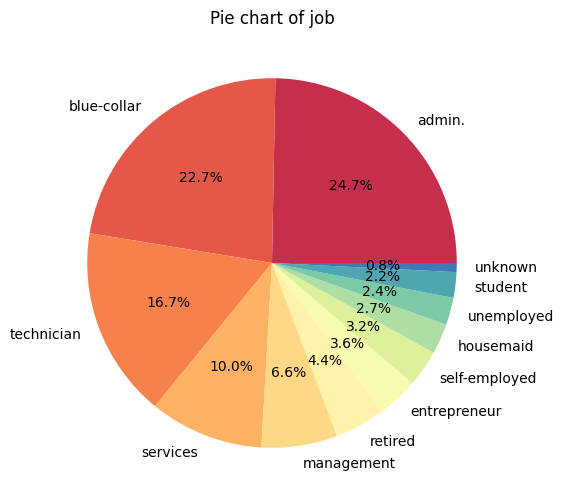

In [17]:
color_palette = sns.color_palette("Spectral", len(job_counts))

plt.figure(figsize=(8, 6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Pie chart of job')
plt.show()

From the pie chart above, it can be seen that the most common job among customers in the dataset is 'admin', followed by 'blue-collar' and 'technician'.

In [18]:
marital_counts = df['marital'].value_counts()
print(marital_counts)

marital
married     4994
single      2338
divorced     892
unknown       14
Name: count, dtype: int64


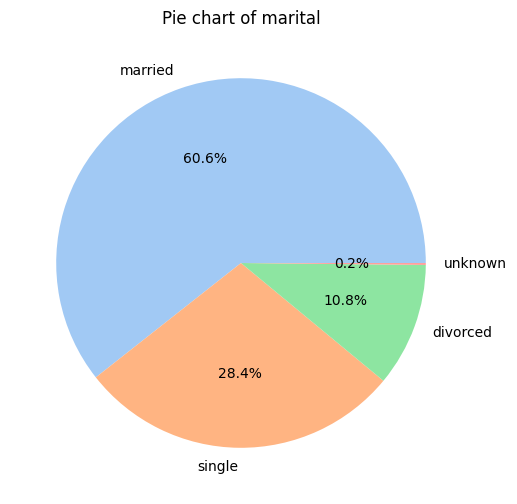

In [19]:
color_palette = sns.color_palette("pastel", len(marital_counts))

sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Pie chart of marital', color='black')
plt.show()

In this dataset, the majority of respondents are married, accounting for 60.6%, followed by single individuals at 28.4%.

In [20]:
education_counts = df['education'].value_counts()
print(education_counts)

education
university.degree      2379
high.school            1915
basic.9y               1243
professional.course    1043
basic.4y                817
basic.6y                486
unknown                 349
illiterate                6
Name: count, dtype: int64


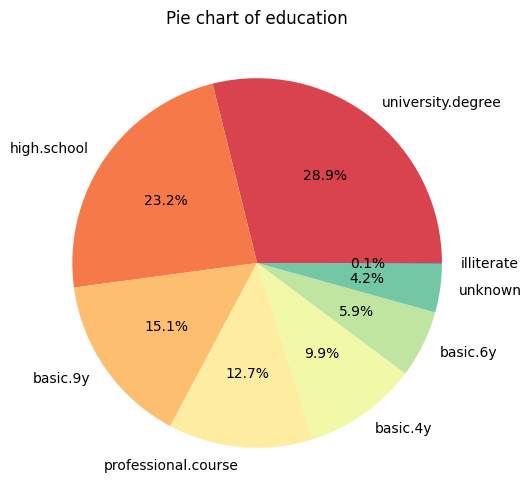

In [21]:
color_palette = sns.color_palette("Spectral", len(education_counts))

plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Pie chart of education')
plt.show()

In the education variable, the customer data shows that the most common education level is 'university degree' at 28.9%, followed by 'high school' at 23.2%, and 'basic 9y' at 15.1%.

In [22]:
default_counts = df['default'].value_counts()
print(default_counts)

default
no         6491
unknown    1747
Name: count, dtype: int64


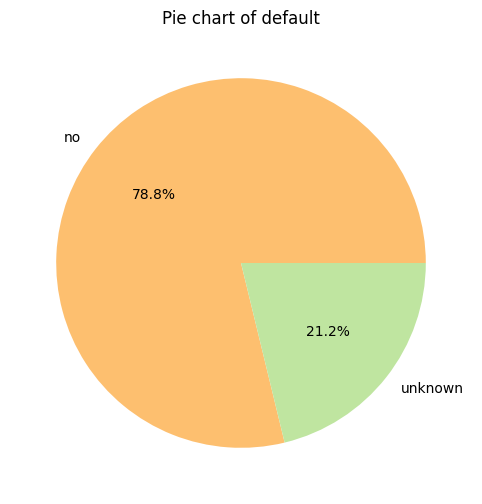

In [23]:
color_palette = sns.color_palette("Spectral", len(default_counts))

plt.figure(figsize=(8, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Pie chart of default')
plt.show()

In the data, only 2 unique values are found in the default variable: 'no' and 'unknown'. The 'no' class dominates the data, accounting for 78.8%.

In [24]:
housing_counts = df['housing'].value_counts()
print(housing_counts)

housing
yes        4284
no         3749
unknown     205
Name: count, dtype: int64


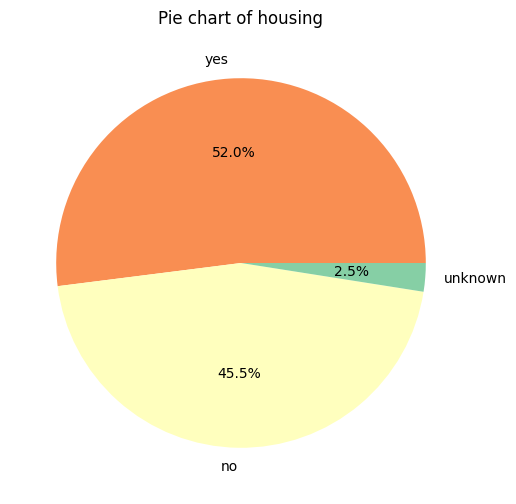

In [25]:
color_palette = sns.color_palette("Spectral", len(housing_counts))

plt.figure(figsize=(8, 6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Pie chart of housing')
plt.show()

In the housing variable, there are 3 classes: 'yes', 'no', and 'unknown'. The 'yes' class is the most frequently occurring value in the data, at 52%, followed by 'no' at 45.5%, with the remainder being 'unknown'.

In [26]:
loan_counts = df['loan'].value_counts()
print(loan_counts)

loan
no         6741
yes        1292
unknown     205
Name: count, dtype: int64


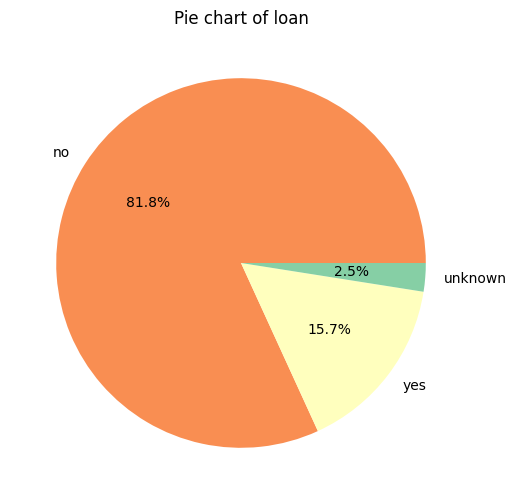

In [27]:
color_palette = sns.color_palette("Spectral", len(loan_counts))

plt.figure(figsize=(8, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Pie chart of loan')
plt.show()

It is observed that 81.8% of customers do not have a personal loan.

In [28]:
contact_counts = df['contact'].value_counts()
print(contact_counts)

contact
cellular     5232
telephone    3006
Name: count, dtype: int64


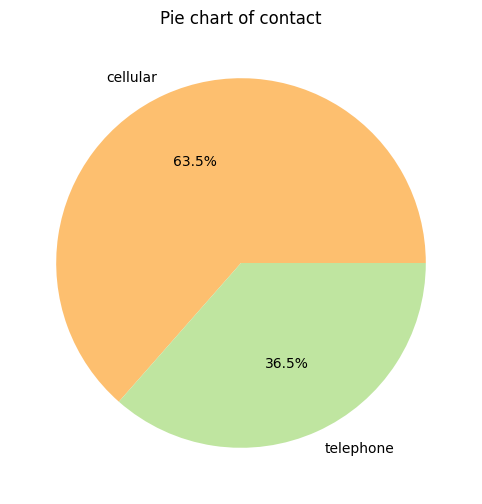

In [29]:
color_palette = sns.color_palette("Spectral", len(contact_counts))

plt.figure(figsize=(8, 6))
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Pie chart of contact')
plt.show()

There are only 2 classes in the contact variable, with 'cellular' occurring 63.5% of the time, while the remainder is 'telephone'.

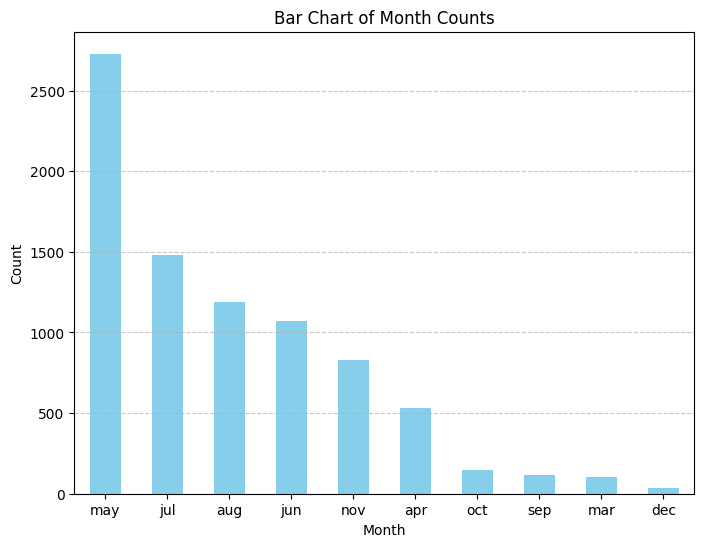

In [30]:
month_counts = df['month'].value_counts()

plt.figure(figsize=(8, 6))
month_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bar Chart of Month Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

Based on the data for the last month customers were contacted, it appears that the highest number of customers was contacted in May.

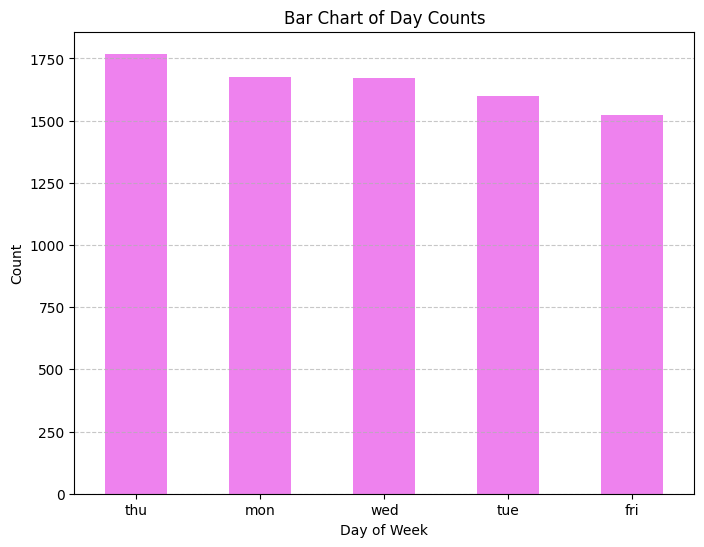

In [31]:
day_counts = df['day_of_week'].value_counts()

plt.figure(figsize=(8, 6))
day_counts.plot(kind='bar', color='violet')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Bar Chart of Day Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

Based on the data, the last contact day of the week with the highest frequency is Thursday, while the day with the lowest occurrence is Friday.

In [32]:
poutcome_counts = df['poutcome'].value_counts()
print(poutcome_counts)

poutcome
nonexistent    7136
failure         836
success         266
Name: count, dtype: int64


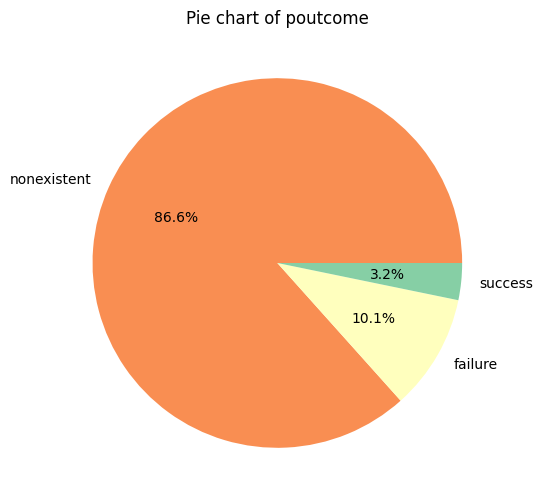

In [33]:
color_palette = sns.color_palette("Spectral", len(poutcome_counts))

plt.figure(figsize=(8, 6))
plt.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Pie chart of poutcome')
plt.show()

In the variable "poutcome," 86.6% of the values are dominated by "nonexistent."

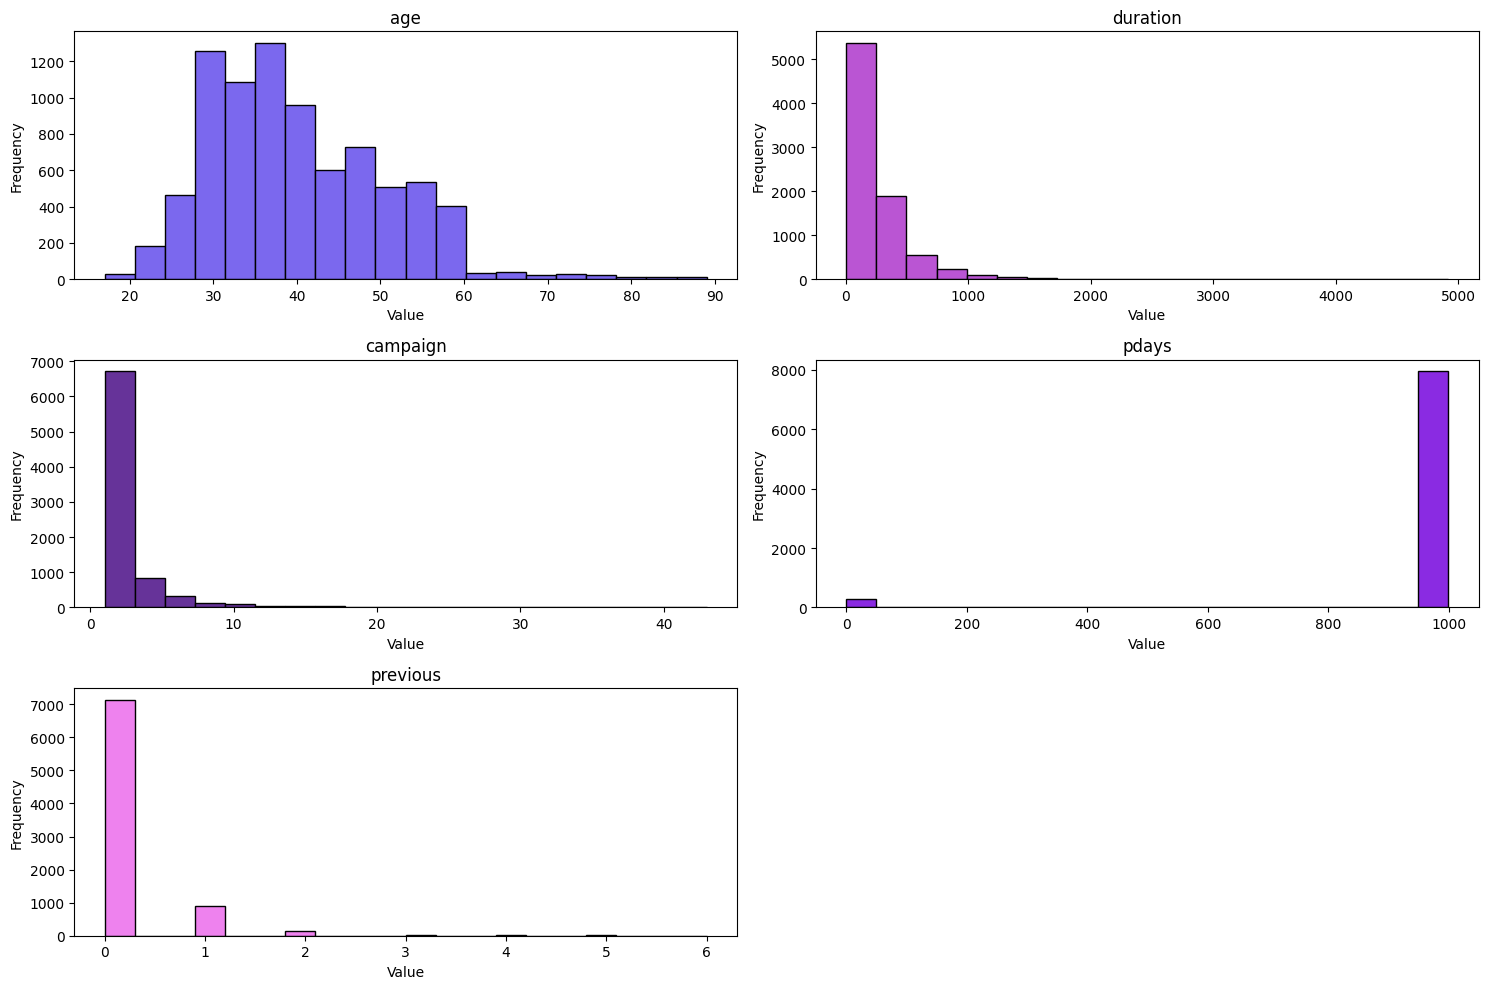

In [34]:
colors = ['mediumslateblue', 'mediumorchid', 'rebeccapurple', 'blueviolet', 'violet', 'slateblue', 'plum']
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(3, 2, i)
    plt.hist(df[col], bins=20, color=colors[i-1], edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From the bar plot of the numerical variables above, it can be seen that the age with the highest frequency is in the range of approximately 30-40 years.

For the "duration" variable, the highest frequency of phone call duration is around 0-250 seconds.

Next, for the "campaign" variable, the highest frequency is around 1-2 contacts during this campaign.

Regarding "pdays," the highest frequency is at 999, indicating customers who have not been contacted.

Finally, for the "previous" feature, the highest frequency is at the value of 0, reaching about 7000, meaning around 7000 customers have never been contacted prior to this campaign.

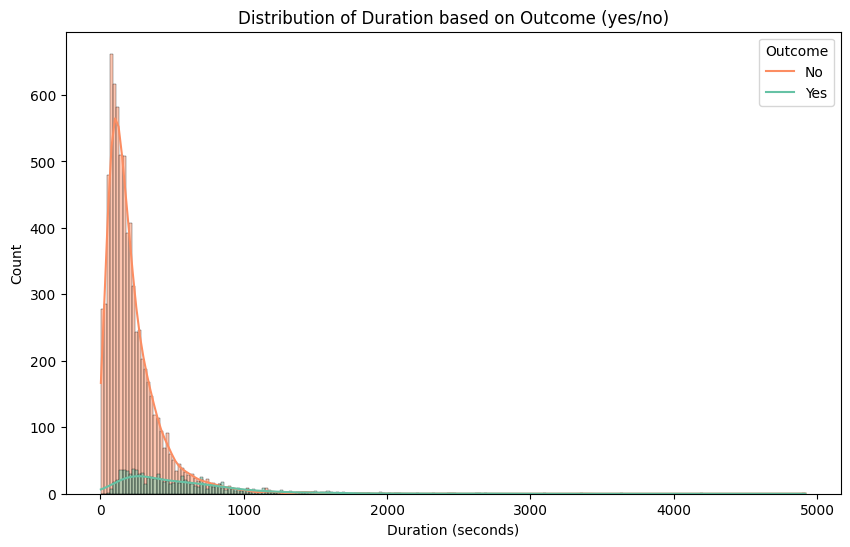

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to include only 'yes' and 'no' values for 'y'
df_filtered = df[df['y'].isin(['yes', 'no'])]

# Plot histogram of 'duration' based on 'y'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='duration', hue='y', kde=True, palette='Set2')
plt.title('Distribution of Duration based on Outcome (yes/no)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')

# Manually set legend labels
plt.legend(title='Outcome', labels=['No', 'Yes'])

plt.show()

In the plot above, it can be seen that the highest frequency for "duration" is around 250 seconds, which applies to both the "yes" and "no" classes.

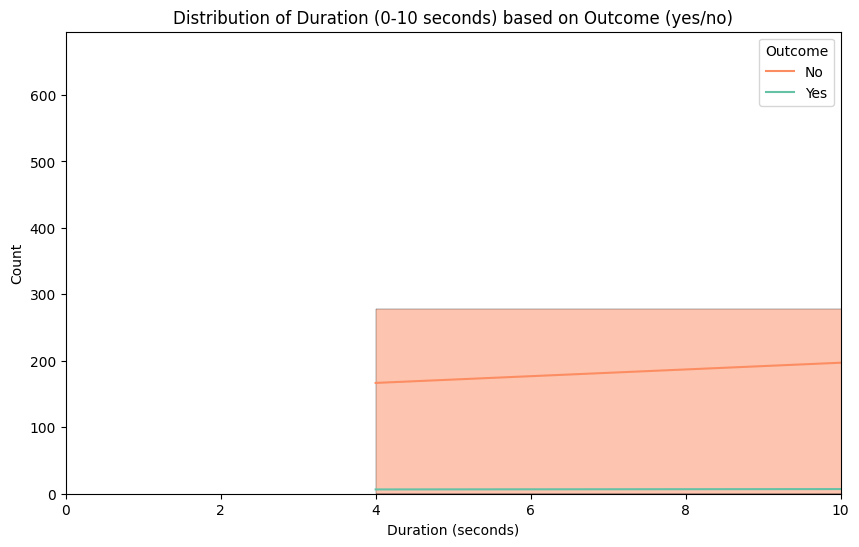

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['y'].isin(['yes', 'no'])]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='duration', hue='y', kde=True, palette='Set2')
plt.title('Distribution of Duration (0-10 seconds) based on Outcome (yes/no)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.xlim(0, 10)  

plt.legend(title='Outcome', labels=['No', 'Yes'])

plt.show()

The shortest duration here is 4 seconds.

In [37]:
no_duration_zero = df[(df['y'] == 'no') & (df['duration'] == 0)]

count_no_duration_zero = len(no_duration_zero)

print(f"Number of rows where y is 'no' and duration is 0: {count_no_duration_zero}")

Number of rows where y is 'no' and duration is 0: 0


In the explanation, it was stated that there is a strong correlation between duration and the target variable. It was noted that, for example, when the duration is 0, the target variable \( y \) is "no." However, upon further examination, it turns out that there is no instance with a duration of 0.

# Split Dataset

In [38]:
input_df = df.drop('y',axis=1)
output_df = df['y']

I split the data with a train-test ratio of 80:20.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 100)

In [40]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
2485,48,technician,married,university.degree,no,no,no,cellular,nov,tue,373.0,4,999,0,nonexistent
4980,30,admin.,divorced,high.school,no,no,no,cellular,nov,thu,418.0,3,999,0,nonexistent
1662,36,services,single,high.school,no,yes,no,cellular,nov,thu,422.0,3,999,0,nonexistent
3852,34,blue-collar,married,basic.6y,unknown,no,no,telephone,jun,mon,61.0,1,999,0,nonexistent
7194,57,admin.,single,university.degree,no,no,no,cellular,jul,tue,105.0,1,999,0,nonexistent


In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6590 entries, 2485 to 5640
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          6590 non-null   int64  
 1   job          6583 non-null   object 
 2   marital      6590 non-null   object 
 3   education    6590 non-null   object 
 4   default      6590 non-null   object 
 5   housing      6590 non-null   object 
 6   loan         6590 non-null   object 
 7   contact      6590 non-null   object 
 8   month        6590 non-null   object 
 9   day_of_week  6590 non-null   object 
 10  duration     6582 non-null   float64
 11  campaign     6590 non-null   int64  
 12  pdays        6590 non-null   int64  
 13  previous     6590 non-null   int64  
 14  poutcome     6590 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 823.8+ KB


In [42]:
x_train.isnull().sum()

age            0
job            7
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       8
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In the 'x_train' data, there are 7 missing values in the 'job' variable and 8 missing values in the 'duration' variable.

In [43]:
x_train['job'].value_counts()

job
admin.           1642
blue-collar      1464
technician       1095
services          670
management        435
retired           298
entrepreneur      236
self-employed     206
housemaid         187
unemployed        160
student           138
unknown            52
Name: count, dtype: int64

I will fix the value "admin" so that it doesn't end with a period.

In [44]:
x_train['job'] = x_train['job'].str.replace('.', '')
x_test['job'] = x_test['job'].str.replace('.', '')

In [45]:
x_train['job'].mode()

0    admin
Name: job, dtype: object

The mode of the "job" feature is "admin," so I will impute the missing values with "admin."

In [46]:
x_train['job'].fillna('admin', inplace=True)
x_test['job'].fillna('admin', inplace=True)

In [47]:
x_train['job'].value_counts()

job
admin            1649
blue-collar      1464
technician       1095
services          670
management        435
retired           298
entrepreneur      236
self-employed     206
housemaid         187
unemployed        160
student           138
unknown            52
Name: count, dtype: int64

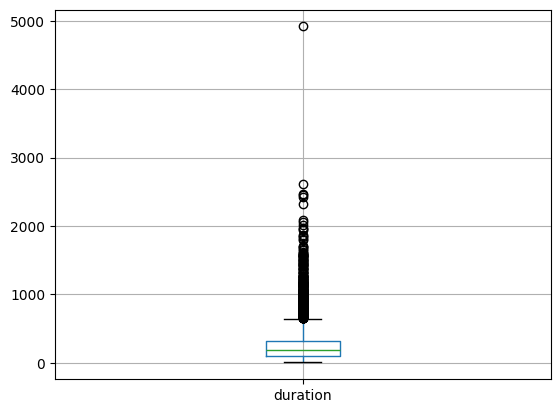

In [48]:
boxplot = x_train.boxplot(column=['duration'])

There are many outliers in the "duration" variable, so I will use the median to impute the missing values.

In [49]:
print(x_train['duration'].describe())

count    6582.000000
mean      257.072926
std       258.499266
min         4.000000
25%       101.000000
50%       180.000000
75%       319.750000
max      4918.000000
Name: duration, dtype: float64


In [50]:
x_train['duration'].median()

180.0

In [51]:
x_train['duration'].fillna(180, inplace=True)
x_test['duration'].fillna(180, inplace=True)

In [52]:
x_train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [53]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6590 entries, 2485 to 5640
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          6590 non-null   int64  
 1   job          6590 non-null   object 
 2   marital      6590 non-null   object 
 3   education    6590 non-null   object 
 4   default      6590 non-null   object 
 5   housing      6590 non-null   object 
 6   loan         6590 non-null   object 
 7   contact      6590 non-null   object 
 8   month        6590 non-null   object 
 9   day_of_week  6590 non-null   object 
 10  duration     6590 non-null   float64
 11  campaign     6590 non-null   int64  
 12  pdays        6590 non-null   int64  
 13  previous     6590 non-null   int64  
 14  poutcome     6590 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 823.8+ KB


It is clear that there are no missing values left in the 'x_train' dataset.

# Encode

For the 'day_of_week' and 'month' features, I will perform one-hot encoding. The reason for not using label encoding is that I don't want the model to mistakenly identify a numeric order or relationship between months or days that doesn't actually exist in this context. Using label encoding might lead the model to incorrectly assume a linear relationship—for instance, treating January (1) as lower than December (12), which is not meaningful in this context.

## Month encode

In [54]:
x_train['month'].unique()

array(['nov', 'jun', 'jul', 'aug', 'may', 'apr', 'sep', 'oct', 'dec',
       'mar'], dtype=object)

It appears that only 10 unique values for the month are present in 'x_train'. Therefore, I will add an "other" category to account for any potential inputs like January and February.

I will save the unique values from 'x_train['month']' into a pickle file. This will make it easier to separate which inputs should go into the 'month_other' column during deployment with FastAPI.

In [55]:
month_train_unique = x_train['month'].unique()
print(month_train_unique)
    
pkl.dump(month_train_unique, open('month_train_unique.pkl', 'wb'))

['nov' 'jun' 'jul' 'aug' 'may' 'apr' 'sep' 'oct' 'dec' 'mar']


I created the `month_other` column to account for cases where there might be data for January or February in `x_test` or during model deployment.

In [56]:
x_train_encoded = pd.get_dummies(x_train, columns=['month'], dtype=int)
x_train_encoded['month_other'] = 0

x_train_encoded.head()
x_train = x_train_encoded

In [57]:
x_test_encoded = pd.get_dummies(x_test, columns=['month'], dtype=int)
missing_cols = set(x_train_encoded.columns) - set(x_test_encoded.columns)

for col in missing_cols:
    x_test_encoded[col] = 0

x_test_encoded['month_other'] = 0

for col in x_test_encoded.columns:
    if col not in x_train_encoded.columns:
        x_test_encoded['month_other'] = x_test_encoded['month_other'] + x_test_encoded[col]
        x_test_encoded.drop(columns=[col], inplace=True)

x_test = x_test_encoded
x_train.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_other
2485,48,technician,married,university.degree,no,no,no,cellular,tue,373.0,...,0,0,0,0,0,0,1,0,0,0
4980,30,admin,divorced,high.school,no,no,no,cellular,thu,418.0,...,0,0,0,0,0,0,1,0,0,0
1662,36,services,single,high.school,no,yes,no,cellular,thu,422.0,...,0,0,0,0,0,0,1,0,0,0
3852,34,blue-collar,married,basic.6y,unknown,no,no,telephone,mon,61.0,...,0,0,0,1,0,0,0,0,0,0
7194,57,admin,single,university.degree,no,no,no,cellular,tue,105.0,...,0,0,1,0,0,0,0,0,0,0


## Day of week encode

In [58]:
x_train['day_of_week'].unique()

array(['tue', 'thu', 'mon', 'wed', 'fri'], dtype=object)

I also saved the unique values of `day_of_week` into a pickle file for use in the prediction code.

In [59]:
dow_train_unique = x_train['day_of_week'].unique()
print(dow_train_unique)
    
pkl.dump(dow_train_unique, open('dow_train_unique.pkl', 'wb'))

['tue' 'thu' 'mon' 'wed' 'fri']


In `x_train`, there are 5 days: Monday to Friday. This aligns with the actual conditions, as the bank operates only on weekdays. Therefore, I won't be adding a `day_of_week_other` column.

In [60]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

x_train_encoded = ohe.fit_transform(x_train[['day_of_week']])
x_test_encoded = ohe.transform(x_test[['day_of_week']])

x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=ohe.get_feature_names_out(['day_of_week']))
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=ohe.get_feature_names_out(['day_of_week']))

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

x_train = pd.concat([x_train.drop(columns=['day_of_week']), x_train_encoded_df], axis=1)
x_test = pd.concat([x_test.drop(columns=['day_of_week']), x_test_encoded_df], axis=1)

## Job encode

In [61]:
job_train_unique = x_train['job'].unique()
print(job_train_unique)
    
pkl.dump(job_train_unique, open('job_train_unique.pkl', 'wb'))

['technician' 'admin' 'services' 'blue-collar' 'management' 'unemployed'
 'entrepreneur' 'student' 'self-employed' 'unknown' 'housemaid' 'retired']


There are many unique values in the `job` column of `x_test`. However, I believe there might still be other job titles that could be input during deployment, such as 'teacher'. Therefore, I will add a `job_other` column.

In [62]:
x_train_encoded = pd.get_dummies(x_train, columns=['job'], dtype=int)
x_train_encoded['job_other'] = 0

x_train_encoded.head()

,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,job_other
0,48,married,university.degree,no,no,no,cellular,373.0,4,999,...,0,0,0,0,0,0,1,0,0,0
1,30,divorced,high.school,no,no,no,cellular,418.0,3,999,...,0,0,0,0,0,0,0,0,0,0
2,36,single,high.school,no,yes,no,cellular,422.0,3,999,...,0,0,0,0,1,0,0,0,0,0
3,34,married,basic.6y,unknown,no,no,telephone,61.0,1,999,...,0,0,0,0,0,0,0,0,0,0
4,57,single,university.degree,no,no,no,cellular,105.0,1,999,...,0,0,0,0,0,0,0,0,0,0


In [63]:
x_train = x_train_encoded

In [64]:
x_test_encoded = pd.get_dummies(x_test, columns=['job'], dtype=int)
missing_cols = set(x_train_encoded.columns) - set(x_test_encoded.columns)

for col in missing_cols:
    x_test_encoded[col] = 0

x_test_encoded['job_other'] = 0

for col in x_test_encoded.columns:
    if col not in x_train_encoded.columns:
        x_test_encoded['job_other'] = x_test_encoded['job_other'] + x_test_encoded[col]
        x_test_encoded.drop(columns=[col], inplace=True)

x_test = x_test_encoded

In [65]:
x_train.head()

,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,job_other
0,48,married,university.degree,no,no,no,cellular,373.0,4,999,...,0,0,0,0,0,0,1,0,0,0
1,30,divorced,high.school,no,no,no,cellular,418.0,3,999,...,0,0,0,0,0,0,0,0,0,0
2,36,single,high.school,no,yes,no,cellular,422.0,3,999,...,0,0,0,0,1,0,0,0,0,0
3,34,married,basic.6y,unknown,no,no,telephone,61.0,1,999,...,0,0,0,0,0,0,0,0,0,0
4,57,single,university.degree,no,no,no,cellular,105.0,1,999,...,0,0,0,0,0,0,0,0,0,0


## Marital encode

In [66]:
marital_train_unique = x_train['marital'].unique()
print(marital_train_unique)

pkl.dump(marital_train_unique, open('marital_train_unique.pkl', 'wb'))

['married' 'divorced' 'single' 'unknown']


Generally, marital status includes married, single, divorced, and widowed. However, in the feature description in the exam question, it is mentioned that widowed is also considered divorced. Therefore, for one-hot encoding, I will not add a `marital_other` column because all possible inputs are already included in `x_train`. During deployment, I will validate that only the values married, divorced, single, and 'unknown' are allowed.

In [67]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

x_train_encoded = ohe.fit_transform(x_train[['marital']])
x_test_encoded = ohe.transform(x_test[['marital']])

x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=ohe.get_feature_names_out(['marital']))
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=ohe.get_feature_names_out(['marital']))

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

x_train = pd.concat([x_train.drop(columns=['marital']), x_train_encoded_df], axis=1)
x_test = pd.concat([x_test.drop(columns=['marital']), x_test_encoded_df], axis=1)

## Education encode

In [68]:
education_train_unique = x_train['education'].unique()
print(education_train_unique)
    
pkl.dump(education_train_unique, open('education_train_unique.pkl', 'wb'))

['university.degree' 'high.school' 'basic.6y' 'basic.9y' 'unknown'
 'basic.4y' 'professional.course' 'illiterate']


There are many unique values in the education column in `x_test`. However, I believe there may still be other education levels that could be input during deployment. Therefore, I will add an `education_other` column.

In [69]:
x_train_encoded = pd.get_dummies(x_train, columns=['education'], dtype=int)
x_train_encoded['education_other'] = 0

x_train_encoded.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,education_other
0,48,no,no,no,cellular,373.0,4,999,0,nonexistent,...,0.0,0,0,0,0,0,0,1,0,0
1,30,no,no,no,cellular,418.0,3,999,0,nonexistent,...,0.0,0,0,0,1,0,0,0,0,0
2,36,no,yes,no,cellular,422.0,3,999,0,nonexistent,...,0.0,0,0,0,1,0,0,0,0,0
3,34,unknown,no,no,telephone,61.0,1,999,0,nonexistent,...,0.0,0,1,0,0,0,0,0,0,0
4,57,no,no,no,cellular,105.0,1,999,0,nonexistent,...,0.0,0,0,0,0,0,0,1,0,0


In [70]:
x_train = x_train_encoded

In [71]:
x_test_encoded = pd.get_dummies(x_test, columns=['education'], dtype=int)
missing_cols = set(x_train_encoded.columns) - set(x_test_encoded.columns)

for col in missing_cols:
    x_test_encoded[col] = 0

x_test_encoded['education_other'] = 0

for col in x_test_encoded.columns:
    if col not in x_train_encoded.columns:
        x_test_encoded['education_other'] = x_test_encoded['education_other'] + x_test_encoded[col]
        x_test_encoded.drop(columns=[col], inplace=True)

x_test = x_test_encoded
x_train.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,education_other
0,48,no,no,no,cellular,373.0,4,999,0,nonexistent,...,0.0,0,0,0,0,0,0,1,0,0
1,30,no,no,no,cellular,418.0,3,999,0,nonexistent,...,0.0,0,0,0,1,0,0,0,0,0
2,36,no,yes,no,cellular,422.0,3,999,0,nonexistent,...,0.0,0,0,0,1,0,0,0,0,0
3,34,unknown,no,no,telephone,61.0,1,999,0,nonexistent,...,0.0,0,1,0,0,0,0,0,0,0
4,57,no,no,no,cellular,105.0,1,999,0,nonexistent,...,0.0,0,0,0,0,0,0,1,0,0


## Label Encoding & Binary Encoding

I used label encoding for the variables `default`, `housing`, `loan`, and `poutcome`. The reasoning is that these variables contain values like "yes" and "no," and in the case of `poutcome`, "failure" and "success." Since there are additional values like "unknown" and "nonexistent," I decided to apply label encoding. I encoded the value "no" as -1 (negative), "unknown" as 0 (neutral), and "yes" as 1 (positive). This approach allows the model to learn patterns in each variable more effectively. For instance, in the context of the `default` variable, the model can understand that a negative value indicates no credit default, while a positive value indicates a customer who has credit.

For the `contact` variable, I applied binary encoding since it has only two unique values.

In [72]:
categorical_mappings = {
    "default": {"no": -1, "unknown": 0, "yes": 1},
    "housing": {"no": -1, "unknown": 0, "yes": 1},
    "loan": {"no": -1, "unknown": 0, "yes": 1},
    "contact": {"cellular": 0, "telephone": 1},
    "poutcome": {"failure" : -1, "nonexistent" : 0, "success": 1}
}

def apply_categorical_mappings(df, mappings):
    for column, mapping in mappings.items():
        df[column] = df[column].map(mapping)
    return df

x_train = apply_categorical_mappings(x_train, categorical_mappings)
x_test = apply_categorical_mappings(x_test, categorical_mappings)

I saved the encoding mapping above into a pickle file for use in the prediction code.

In [73]:
with open('mappings.pkl', 'wb') as f:
    pkl.dump({
        'categorical_mappings': categorical_mappings
    }, f)

In [74]:
x_train.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,education_other
0,48,-1,-1,-1,0,373.0,4,999,0,0,...,0.0,0,0,0,0,0,0,1,0,0
1,30,-1,-1,-1,0,418.0,3,999,0,0,...,0.0,0,0,0,1,0,0,0,0,0
2,36,-1,1,-1,0,422.0,3,999,0,0,...,0.0,0,0,0,1,0,0,0,0,0
3,34,0,-1,-1,1,61.0,1,999,0,0,...,0.0,0,1,0,0,0,0,0,0,0
4,57,-1,-1,-1,0,105.0,1,999,0,0,...,0.0,0,0,0,0,0,0,1,0,0


In [75]:
x_train_num = x_train[num_cols]
x_train_num.head(10)

,age,duration,campaign,pdays,previous
0,48,373.0,4,999,0
1,30,418.0,3,999,0
2,36,422.0,3,999,0
3,34,61.0,1,999,0
4,57,105.0,1,999,0
5,53,64.0,1,999,0
6,38,353.0,1,999,0
7,42,250.0,4,4,2
8,33,420.0,1,999,0
9,56,369.0,1,999,0


In [76]:
x_train['pdays'].value_counts()

pdays
999    6353
6        82
3        67
4        22
2         9
7         8
13        7
10        7
5         6
9         5
1         4
14        4
0         4
12        3
15        3
25        1
8         1
26        1
11        1
19        1
17        1
Name: count, dtype: int64

In [77]:
x_train.shape

(6590, 52)

In [78]:
6353/6590

0.9640364188163885

96.4% of the values in the `pdays` column of `x_train` are 999, indicating that the clients have not been contacted. Therefore, I will change the `pdays` variable to a categorical variable named `contact_status`. Values that are not 999 will be assigned to the class "contacted" (contact_status = 1), while those that are still 999 will indicate "not contacted" (contact_status = 0).

In [79]:
x_train['contact_status'] = x_train['pdays'].apply(lambda x: 1 if x != 999 else 0)
x_test['contact_status'] = x_test['pdays'].apply(lambda x: 1 if x != 999 else 0)

x_train.drop(columns=['pdays'], inplace=True)
x_test.drop(columns=['pdays'], inplace=True)

x_train.head()

,age,default,housing,loan,contact,duration,campaign,previous,poutcome,month_apr,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,education_other,contact_status
0,48,-1,-1,-1,0,373.0,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,30,-1,-1,-1,0,418.0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,36,-1,1,-1,0,422.0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,34,0,-1,-1,1,61.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,57,-1,-1,-1,0,105.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [80]:
num_cols_new =  ['age', 'duration', 'campaign', 'previous']
x_train_num_new = x_train[num_cols_new]

In [81]:
x_train_num_new.head(10)

,age,duration,campaign,previous
0,48,373.0,4,0
1,30,418.0,3,0
2,36,422.0,3,0
3,34,61.0,1,0
4,57,105.0,1,0
5,53,64.0,1,0
6,38,353.0,1,0
7,42,250.0,4,2
8,33,420.0,1,0
9,56,369.0,1,0


There are discrepancies in the units of the values, with some in single units, some in tens, and others in hundreds. Therefore, scaling is necessary to standardize the units. I will use Standard Scaler for this purpose.

## Standard Scaler

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train[num_cols_new])
# x_test_scaled = scaler.transform(x_test[num_cols_new])

# x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=num_cols_new, index=x_train.index)
# x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=num_cols_new, index=x_test.index)

x_train[num_cols_new] = scaler.fit_transform(x_train[num_cols_new])
x_test[num_cols_new] = scaler.transform(x_test[num_cols_new])

In [83]:
filename = 'standard_scaler.pkl'
pkl.dump(scaler, open(filename, 'wb'))

In [84]:
x_train.head(10)

,age,default,housing,loan,contact,duration,campaign,previous,poutcome,month_apr,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,education_other,contact_status
0,0.759413,-1,-1,-1,0,0.449106,0.485175,-0.344503,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.950109,-1,-1,-1,0,0.623298,0.138095,-0.344503,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.380269,-1,1,-1,0,0.638781,0.138095,-0.344503,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.570216,0,-1,-1,1,-0.758620,-0.556066,-0.344503,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.614174,-1,-1,-1,0,-0.588300,-0.556066,-0.344503,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1.234280,0,1,1,0,-0.747007,-0.556066,-0.344503,0,0,...,0,0,1,0,0,0,0,0,0,0
6,-0.190322,-1,1,1,0,0.371688,-0.556066,-0.344503,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0.189572,-1,1,1,0,-0.027017,0.485175,3.713182,1,0,...,0,0,0,0,0,0,0,1,0,1
8,-0.665189,0,-1,-1,1,0.631040,-0.556066,-0.344503,0,0,...,0,0,0,0,0,0,1,0,0,0
9,1.519201,-1,-1,-1,0,0.433623,-0.556066,-0.344503,0,0,...,0,0,1,0,0,0,0,0,0,0


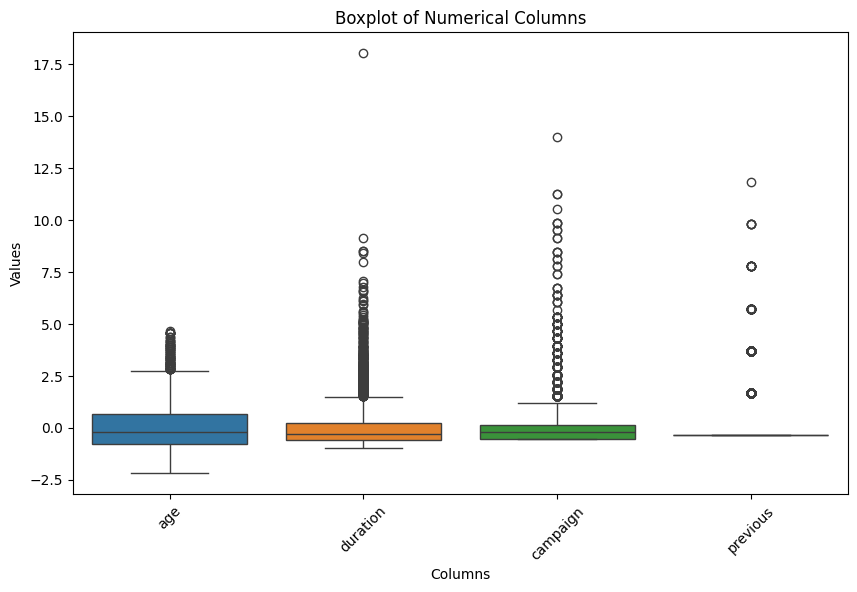

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=x_train[num_cols_new])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

The boxplot above shows that all four features contain outliers. I haven't applied any special treatment to these outliers, as I expect the model to handle them effectively. Thus, the outliers present a challenge for the model. For modeling, I chose to use tree-based methods, which are generally robust to outliers.

## SMOTE

In [86]:
y_train.value_counts()

y
no     5857
yes     733
Name: count, dtype: int64

There is an imbalance in the dataset, so I will perform upsampling using SMOTE.

In [88]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=26)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

y_train_res.value_counts()

y
no     5857
yes    5857
Name: count, dtype: int64

In [89]:
x_train_res.head()

,age,default,housing,loan,contact,duration,campaign,previous,poutcome,month_apr,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,education_other,contact_status
0,0.759413,-1,-1,-1,0,0.449106,0.485175,-0.344503,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.950109,-1,-1,-1,0,0.623298,0.138095,-0.344503,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.380269,-1,1,-1,0,0.638781,0.138095,-0.344503,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.570216,0,-1,-1,1,-0.758620,-0.556066,-0.344503,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.614174,-1,-1,-1,0,-0.588300,-0.556066,-0.344503,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model 1 - Decision Tree

I have tried using accuracy and F1 score for evaluation with the test data. The F1 score for class 1 is consistently better with the F1 score metric than with accuracy. Therefore, I will use the F1 score for class 1 as the evaluation metric.

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scorer = make_scorer(f1_score, pos_label='yes')

dt = DecisionTreeClassifier(random_state=26)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=parameters, scoring=scorer, cv=5)
grid_search_dt.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=26),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score, pos_label=yes))

In [91]:
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best F1-score for 'yes' class: ", grid_search_dt.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best F1-score for 'yes' class:  0.8918562429089528


In [92]:
dt_best = grid_search_dt.best_estimator_
dt_predict = dt_best.predict(x_test)

In [93]:
y_test.value_counts()

y
no     1472
yes     176
Name: count, dtype: int64

In [94]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, dt_predict, target_names=['no', 'yes']))


Classification Report

              precision    recall  f1-score   support

          no       0.97      0.85      0.90      1472
         yes       0.37      0.76      0.50       176

    accuracy                           0.84      1648
   macro avg       0.67      0.80      0.70      1648
weighted avg       0.90      0.84      0.86      1648



## Model 2 - Bagging Decision Tree

In [95]:
from sklearn.ensemble import BaggingClassifier

param_grid = {
    'n_estimators': [3, 5, 7, 10, 12, 15, 17, 20],
    'max_samples': [x / 10 for x in range(1, 11)]
}
scorer = make_scorer(f1_score, pos_label='yes')

bagging_dt = BaggingClassifier(base_estimator=dt_best, random_state=42)

grid_search = GridSearchCV(estimator=bagging_dt, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(x_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=8,
                                                                               min_samples_leaf=2,
                                                                               min_samples_split=5,
                                                                               random_state=26),
                                         random_state=42),
             param_grid={'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                         0.9, 1.0],
                         'n_estimators': [3, 5, 7, 10, 12, 15, 17, 20]},
             scoring=make_scorer(f1_score, pos_label=yes))

In [96]:
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best F1-score for 'yes' class: ", grid_search_dt.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best F1-score for 'yes' class:  0.8918562429089528


In [97]:
bagging_best = grid_search.best_estimator_
y_pred = bagging_best.predict(x_test)

In [98]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['no', 'yes']))


Classification Report:
              precision    recall  f1-score   support

          no       0.97      0.86      0.91      1472
         yes       0.40      0.78      0.53       176

    accuracy                           0.85      1648
   macro avg       0.68      0.82      0.72      1648
weighted avg       0.91      0.85      0.87      1648



In [99]:
filename = 'Bagging_dt.pkl'
pkl.dump(bagging_best, open(filename, 'wb'))

# Evaluation and Conclusion

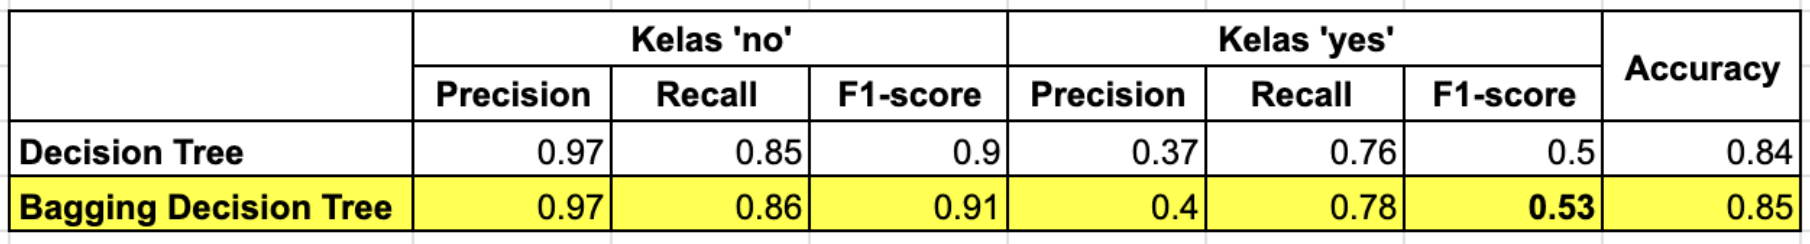

I created two models: a decision tree with hyperparameters tuned using grid search CV, and a bagging decision tree that uses the decision tree from the first model as the base estimator.

Given the imbalance in the dataset, I did not use accuracy as the evaluation metric.

In this case, the bank aims to identify customers with a higher likelihood of subscribing to long-term deposits and focus marketing efforts on them. When evaluating the model, we need to identify what is important and should be prioritized:

1. A high precision value means the model accurately identifies customers who are truly likely to subscribe to the long-term deposit program. This is crucial for ensuring marketing resources are used efficiently and not wasted on customers who are unlikely to convert.
  
2. A high recall value indicates the model successfully identifies most customers who genuinely have the potential to subscribe to the long-term deposit program. This is vital as the bank wouldn’t want to miss opportunities to promote to potential customers.

In conclusion, minimizing false positives (customers predicted to be likely but aren't) and minimizing false negatives (customers who are likely but not predicted) is equally important in this case. Therefore, I decided to use the F1 score as the primary evaluation metric to determine the best model, as the F1 score combines precision and recall into a single value, providing a balance between the two.

By focusing on the F1-Score for the 'yes' class, the decision tree model has an F1-Score of 50%, while the bagging decision tree model achieves an F1-Score of 53%. This indicates that the bagging decision tree model is superior in identifying customers who are likely to subscribe to the long-term deposit program.

Furthermore, when comparing other metrics such as precision and recall for the 'yes' class, the bagging decision tree model also outperforms the decision tree model.

Overall, when examining accuracy along with the evaluation metrics of precision, recall, and F1 score for the 'no' class, the bagging decision tree model consistently demonstrates superior performance compared to the decision tree model.

Therefore, I chose the bagging decision tree model to be used for developing a machine learning API that predicts whether an individual has a greater likelihood of subscribing or not.